# Demo script for data exploration

In [3]:
import numpy as np # import numpy matrix for calculus with matrices
import GLFM        # import General Latent Feature Model Library
import matplotlib.pyplot as plt # import plotting library
import time        # import time to be able to measure iteration speed

# import libraries for I/O of data
import scipy.io
import csv

from aux import preprocess
from aux import plot_dim
from aux import plot_dim_1feat

In [4]:
# ---------------------------------------------
# 1. LOAD DATA TO BE EXPLORED
# ---------------------------------------------
print '\n 1. LOAD DATABASE TO EXPLORE\n'
# Fields inside structure
#       xlabel: [502x1 double]
#            X: [502x16 double]
#            C: 'cpncnnccnncpnnpc'
#   cat_labels: {[]  []  []  {10x1 cell}  []  [] {4x1 cell}  ... []}
#       ylabel: {'stage'  'rx'  'dtime' 'status'  'age'  'wt'  'pf'... 'bm'}
#  ylabel_long: {1x16 cell}
input_file = '../databases/dataExploration/mat/prostate.mat'
tmp = scipy.io.loadmat(input_file)
data = tmp['data'][0,0] # data is a dictionary with the following keys
(N,D) = data['X'].shape
X = data['X'].transpose() #  ndarray of dimensions D * N
C = str(data['C'][0])
# dealing with missing data: replace np.nan by -1
(xx,yy) = np.where(np.isnan(X)) # find positions where X is nan (i.e. missing data)
for r in xrange(len(xx)):
    X[xx[r],yy[r]] = -1

# prepare input data for C++ inference routine # TODO: hide from user
X = preprocess(X,C)



 1. LOAD DATABASE TO EXPLORE



In [5]:
# ---------------------------------------------
# 2. INITIALIZATION FOR GLFM ALGORITHM
# ---------------------------------------------
print '\n 2. INITIALIZATION\n'

print '\tInitializing Z...'
Kinit = 1   # initial number of latent features
prob = 0.2  # probability of feature activation in matrix Z
Z = np.ascontiguousarray( ((np.random.rand(Kinit,N) < prob) * 1.0).astype('float64') )
bias = 0
# with bias
#Z = np.concatenate((np.ones((N,1)),(np.random.rand(N,Kest-1) < 0.2)*1.0),axis=1)
#bias = 1

print '\tInitialization of variables needed for the GLFM model...'
# Generate weights for transformation
W = np.ascontiguousarray( 2.0 / np.max(X,1) ) # TODO: account for missings

Niter = 100  # number of algorithm iterations
s2y = 0.5    # noise variance for pseudo-obervations
s2B = 1      # noise variance for feature values
s2u = 0.1    # auxiliary noise
alpha = 1    # mass parameter for the Indian Buffet Process




 2. INITIALIZATION

	Initializing Z...
	Initialization of variables needed for the GLFM model...


In [6]:
# ---------------------------------------------
# 3. RUN INFERENCE FOR GLFM ALGORITHM
# ---------------------------------------------
print '\n 3. INFERENCE\n'

print '\tInfering latent features...'
tic = time.time()
(Z_out,B_out,Theta_out) = GLFM.infer(X,C,Z,W,Nsim=Niter,s2Y=s2y, s2B=s2B, maxK=D, bias=bias)
toc = time.time()
time = tic - toc
print '\tElapsed: %.2f seconds.' % (toc-tic)




 3. INFERENCE

	Infering latent features...

Entering C function...
Back to Python OK
B_out[D,Kest,maxR] where D=16, Kest=10, maxR=10
	Elapsed: 12.46 seconds.



 4. PROCESSING RESULTS



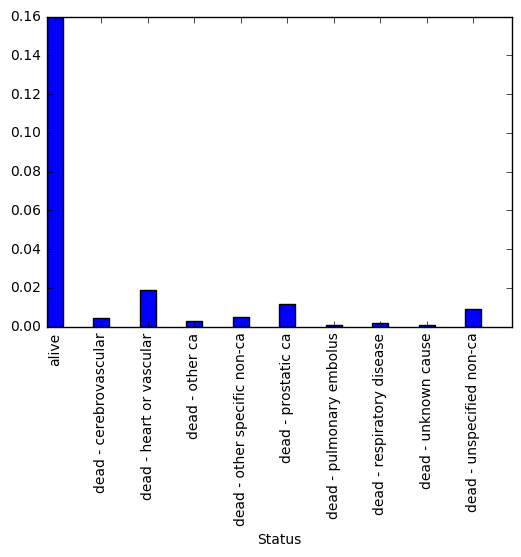

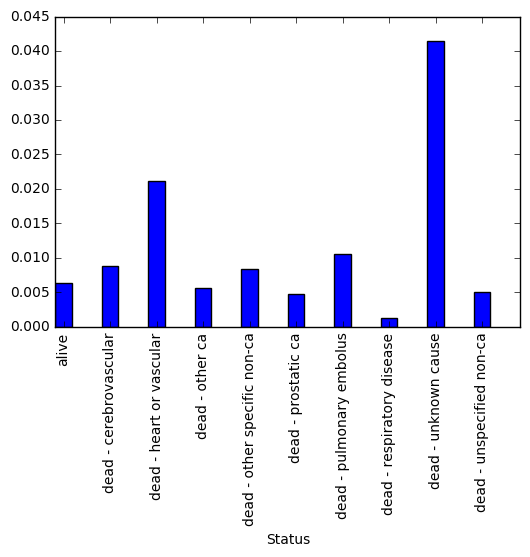

SUCCESSFUL


In [7]:
# ---------------------------------------------
# 4. PROCESS RESULTS
# ---------------------------------------------
print '\n 4. PROCESSING RESULTS\n'

Kest = B_out.shape[1] # number of inferred latent features
D = B_out.shape[0]    # number of dimensions


k = 0
d = 3
#for d in xrange(D):
# Signature: plot_dim(X,B,Theta,C,d,k,s2Y,s2u,missing=-1,labels=[])
ylab = str(data['ylabel_long'][0][d].tolist()[0])
V = np.squeeze(data['cat_labels'][0][d])
catlab = tuple( map(lambda x: str(x.tolist()[0]),V) )
plot_dim_1feat(X, B_out, Theta_out, C,d,k,s2y,s2u,\
        xlabel=ylab, catlabel=catlab)

k = 1
#for d in xrange(D):
# Signature: plot_dim(X,B,Theta,C,d,k,s2Y,s2u,missing=-1,labels=[])
ylab = str(data['ylabel_long'][0][d].tolist()[0])
V = np.squeeze(data['cat_labels'][0][d])
catlab = tuple( map(lambda x: str(x.tolist()[0]),V) )
plot_dim_1feat(X, B_out, Theta_out, C,d,k,s2y,s2u,\
        xlabel=ylab, catlabel=catlab)

print "SUCCESSFUL"